### **Análisis de datos relacionados a la felicidad**

En el notebook se analizan los datos relacionados a la felicidad utilizando el dataset de kaggle: https://www.kaggle.com/datasets/unsdsn/world-happiness

El dataset contiene información sobre la felicidad en diferentes países del mundo. Este dataset incluye variables como el puntaje de felicidad, el PIB per cápita, la expectativa de vida saludable, la libertad, la generosidad, entre otras.



In [5]:
# librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# importacion de los datos y conversion a dataframe
df = pd.read_csv('data_2019.csv')
print(df.head(10))

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   
5             6       Switzerland  7.480           1.452           1.526   
6             7            Sweden  7.343           1.387           1.487   
7             8       New Zealand  7.307           1.303           1.557   
8             9            Canada  7.278           1.365           1.505   
9            10           Austria  7.246           1.376           1.475   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                  

In [7]:
# ultimas filas
print(df.tail(5))

     Overall rank         Country or region  Score  GDP per capita  \
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  
151       0.217                      0.411  
152       0.276     

In [8]:
# tipos de datos
df.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [9]:
# info del dataframe 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None


In [10]:
# estadisticas bascias del dataframe
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


### **Conversión de datos**

In [11]:
# convertir object a string
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})
print(df.dtypes)

Overall rank                             int64
Country or region               string[python]
Score                                  float64
GDP per capita                         float64
Social support                         float64
Healthy life expectancy                float64
Freedom to make life choices           float64
Generosity                             float64
Perceptions of corruption              float64
dtype: object


### **Identificación de valores nulos**

In [12]:
# cantidad de datos sin NA 
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos con NA
qna=df.isnull().sum(axis=0)
# proporcion de datos con NA y sin NA
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Overall rank,156,0,0.0
Country or region,156,0,0.0
Score,156,0,0.0
GDP per capita,156,0,0.0
Social support,156,0,0.0
Healthy life expectancy,156,0,0.0
Freedom to make life choices,156,0,0.0
Generosity,156,0,0.0
Perceptions of corruption,156,0,0.0


In [13]:
df.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [38]:
print(df['Country or region'].unique())

<StringArray>
[                 'Finland',                  'Denmark',
                   'Norway',                  'Iceland',
              'Netherlands',              'Switzerland',
                   'Sweden',              'New Zealand',
                   'Canada',                  'Austria',
 ...
                    'Haiti',                 'Botswana',
                    'Syria',                   'Malawi',
                    'Yemen',                   'Rwanda',
                 'Tanzania',              'Afghanistan',
 'Central African Republic',              'South Sudan']
Length: 156, dtype: string


### **Visualizaciones**

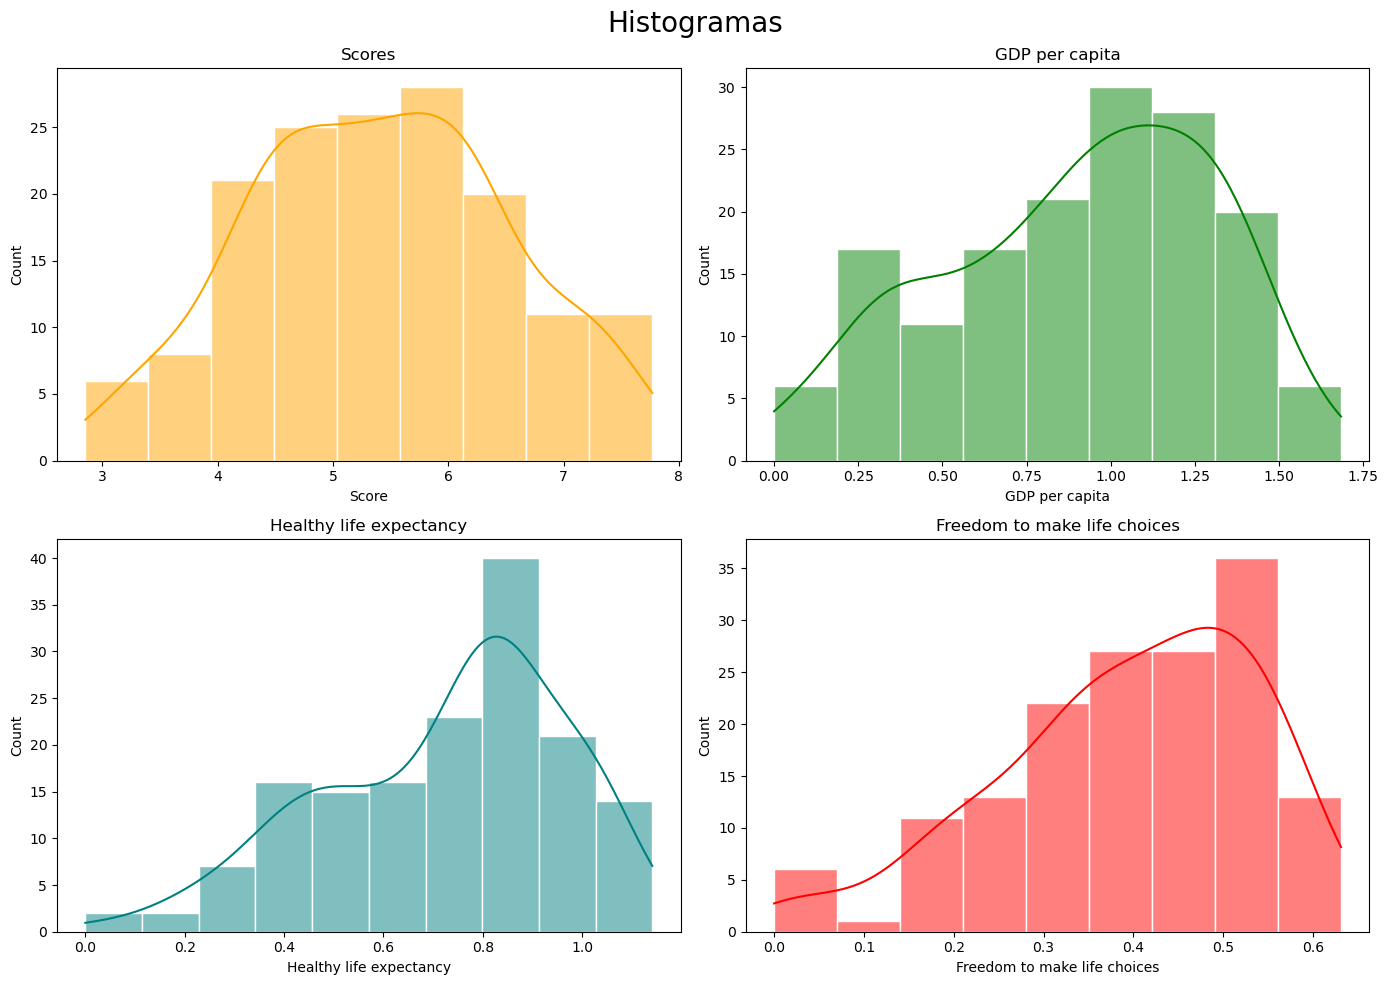

In [31]:
# crear figura y eje
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# creacion de histograma de variables 
# score
sns.histplot(data=df, x='Score', kde=True, ax=axs[0, 0], color='orange', edgecolor='white')
axs[0, 0].set_title('Scores')

# gdp per capita
sns.histplot(data=df, x='GDP per capita', kde=True, ax=axs[0, 1], color='green', edgecolor='white')
axs[0, 1].set_title('GDP per capita')

# healthy life expectancy
sns.histplot(data=df, x='Healthy life expectancy', kde=True, ax=axs[1, 0], color='teal', edgecolor='white')
axs[1, 0].set_title('Healthy life expectancy')

# freedom
sns.histplot(data=df, x='Freedom to make life choices', kde=True, ax=axs[1, 1], color='red', edgecolor='white')
axs[1, 1].set_title('Freedom to make life choices')


plt.suptitle('Histogramas', fontsize=20)
plt.tight_layout()
plt.show()

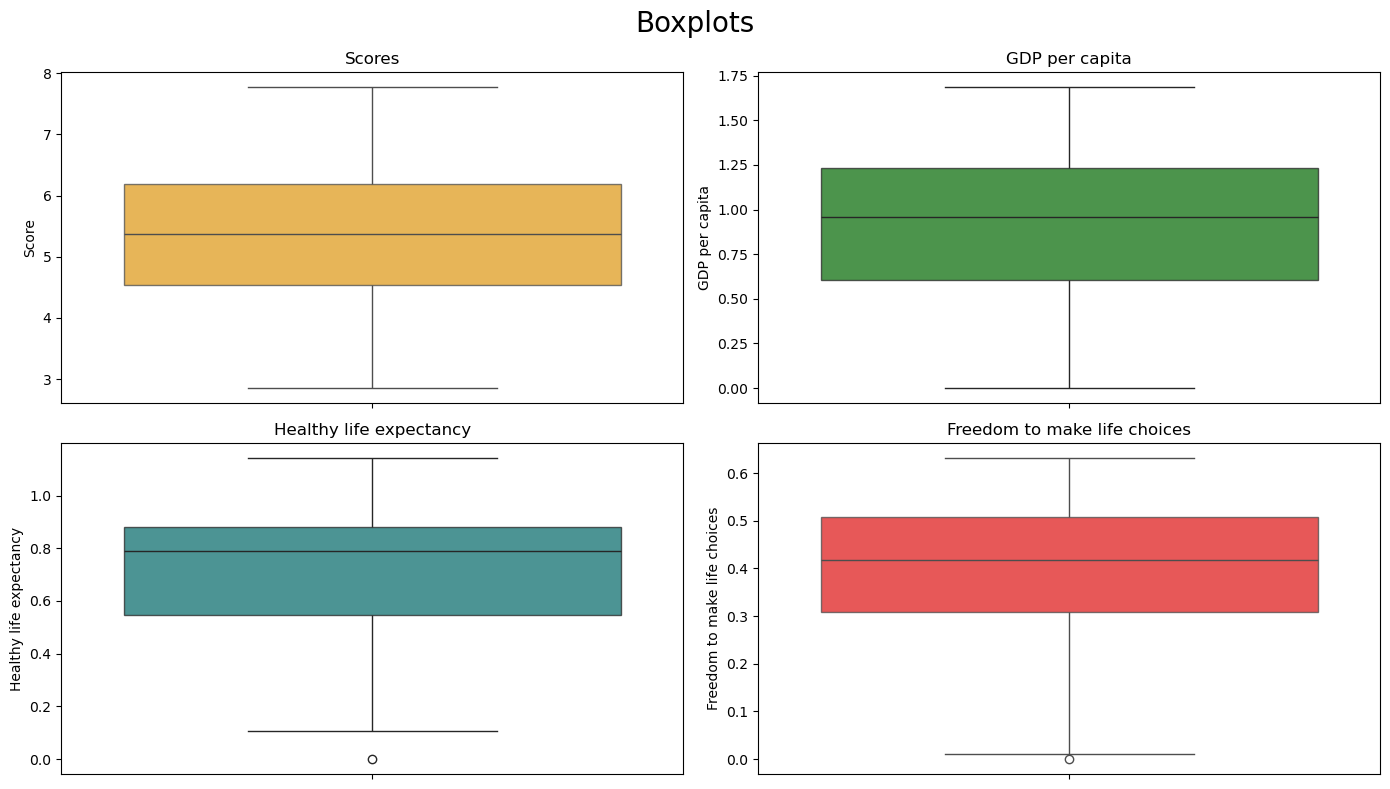

In [52]:
# crear figura y eje
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# boxplot scores
sns.boxplot(data=df, y='Score', ax=axs[0, 0], color='orange', boxprops=dict(alpha=0.75))
axs[0, 0].set_title('Scores')

# boxplot gdp
sns.boxplot(data=df, y='GDP per capita', ax=axs[0,1], color='green', boxprops=dict(alpha=0.75))
axs[0, 1].set_title('GDP per capita')

# boxplot healthy life expectancy
sns.boxplot(data=df, y='Healthy life expectancy', ax=axs[1, 0], color='teal', boxprops=dict(alpha=0.75))
axs[1, 0].set_title('Healthy life expectancy')

sns.boxplot(data=df, y='Freedom to make life choices', ax=axs[1, 1], color='red', boxprops=dict(alpha=0.75))
axs[1, 1].set_title('Freedom to make life choices')


plt.suptitle('Boxplots', fontsize=20)
plt.tight_layout()
plt.show()


### **Análisis**

La variable "score" es el puntaje asignado relativo a la felicidad. En el histograma, se puede observar que esta variable presenta una distribución del tipo "normal", ya que tiene un máximo en el centro, con valores que entre 5.5 y 6. Con la ayuda del boxplot se logra identificar que los valores mínimos estarían en torno a 3 y los valores máximos alrededor de 8, por otro lado, la mediana se encuentra en torno a 5.5. 

Para las variables "GDP per capita", "healthy life expectancy" y "freedom to make life choices" se observa que la distribución mostrada en sus respectivos histogramas se encuentra más sesgada hacia la derecha. Los boxplot para cada variable muestran que en el caso de "GDP per capita" y "freedom to make life choices", la mediana se encuentra practicamente en el centro, mientras que para "healty life expectancy" la mediana se encuentra desplazada hacia el limite superior de la caja. Otro punto a destacar es que los boxplot de "freedom to make life choices" y "healthy life expectancy" muestran algunos outliers.  